📊 Energy Compaction Results:
Top 10 Coefficients:
  DFT Energy % : 26.9186
  DCT Energy % : 1.8128
Top 20 Coefficients:
  DFT Energy % : 44.6511
  DCT Energy % : 54.3025
Top 30 Coefficients:
  DFT Energy % : 46.5406
  DCT Energy % : 83.0852
Top 40 Coefficients:
  DFT Energy % : 48.0504
  DCT Energy % : 89.4311


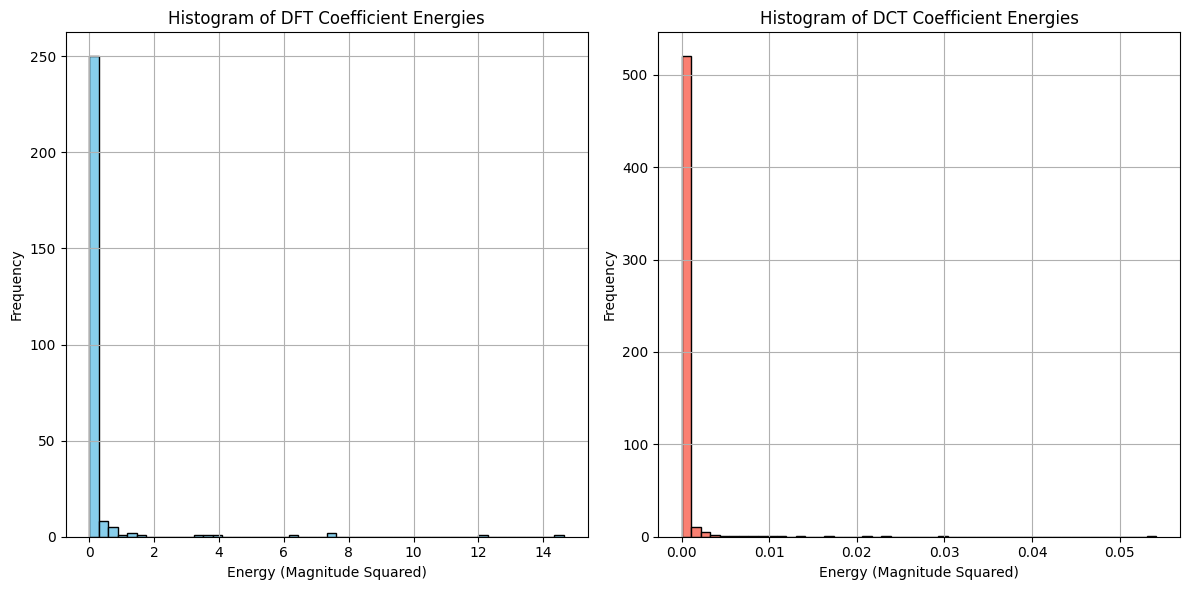

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.fftpack import dct

# === Load Speech File ===
file = '/content/LJ001-0004.wav'
signal, sample_rate = librosa.load(file, sr=None)

# === Frame Extraction ===
frame_length = int(0.025 * sample_rate)  # 25 ms frame
frame = signal[1000:1000 + frame_length]
windowed_frame = frame * np.hamming(frame_length)

# === DFT Calculation ===
dft_full = np.fft.fft(windowed_frame)
dft_magnitude = np.abs(dft_full)
dft_result = dft_magnitude[:frame_length // 2]  # Keep only first half
total_dft_energy = np.sum(dft_magnitude ** 2)

# === DCT Calculation ===
dct_result = np.abs(dct(windowed_frame, type=2, norm='ortho'))
total_dct_energy = np.sum(dct_result ** 2)

# === Energy Compaction Function ===
def energy_compaction(coeffs, N, total_energy):
    compacted_energy = np.sum(coeffs[:N] ** 2)
    return 100 * compacted_energy / total_energy

# === Energy Compaction Calculation ===
Ns = [10, 20, 30, 40]
print("📊 Energy Compaction Results:")
for N in Ns:
    dft_energy = energy_compaction(dft_result, N, total_dft_energy)
    dct_energy = energy_compaction(dct_result, N, total_dct_energy)
    print(f"Top {N} Coefficients:")
    print(f"  DFT Energy % : {dft_energy:.4f}")
    print(f"  DCT Energy % : {dct_energy:.4f}")

# === Plot Histograms ===
plt.figure(figsize=(12, 6))

# DFT Histogram
plt.subplot(1, 2, 1)
plt.hist(dft_result**2, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of DFT Coefficient Energies')
plt.xlabel('Energy (Magnitude Squared)')
plt.ylabel('Frequency')
plt.grid(True)

# DCT Histogram
plt.subplot(1, 2, 2)
plt.hist(dct_result**2, bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of DCT Coefficient Energies')
plt.xlabel('Energy (Magnitude Squared)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

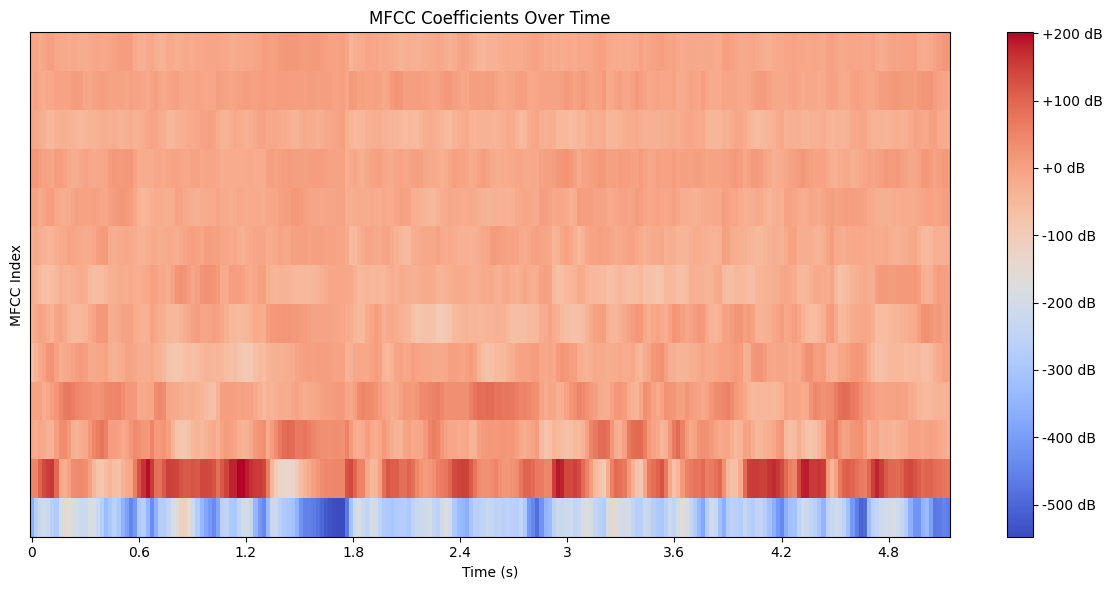

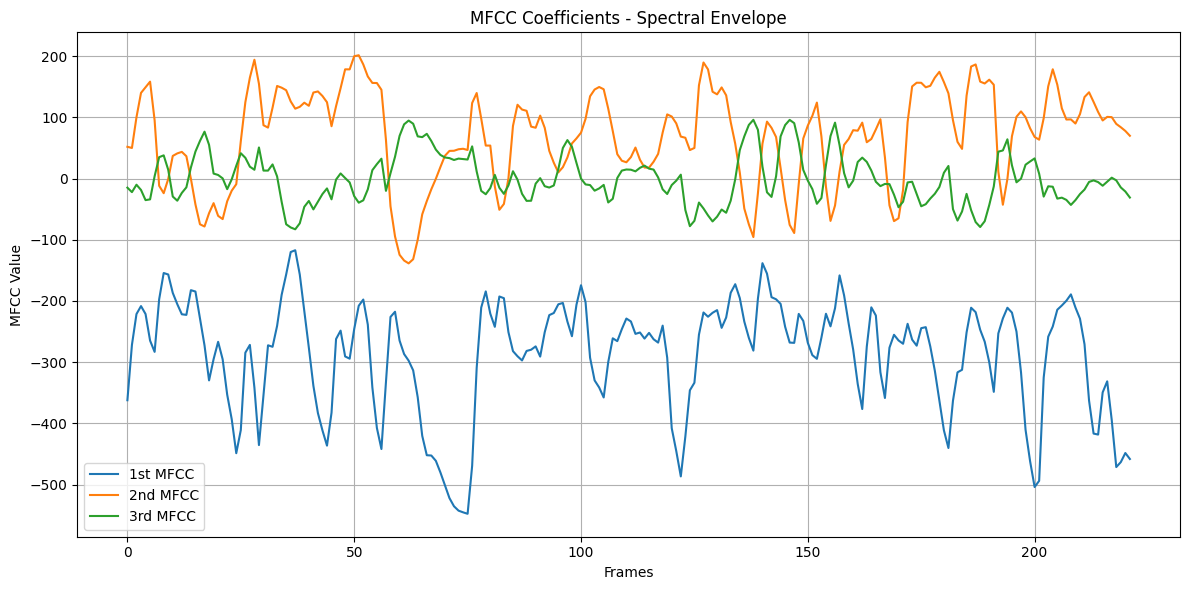

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# === Load Speech File ===
file = '/content/LJ001-0004.wav'
signal, sample_rate = librosa.load(file, sr=None)

# === MFCC Feature Extraction ===
mfcc = librosa.feature.mfcc(y=signal, sr=sample_rate, n_mfcc=13)

# === Plot Full MFCC Spectrogram ===
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc, x_axis='time', sr=sample_rate, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Coefficients Over Time')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Index')
plt.tight_layout()
plt.show()

# === Plot First 3 MFCCs Over Time ===
plt.figure(figsize=(12, 6))
plt.plot(mfcc[0], label="1st MFCC")
plt.plot(mfcc[1], label="2nd MFCC")
plt.plot(mfcc[2], label="3rd MFCC")
plt.title('MFCC Coefficients - Spectral Envelope')
plt.xlabel('Frames')
plt.ylabel('MFCC Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
